<div class="markdown-google-sans">
  <center>
  <h1>Devices and circuits for Artificial Intelligence</h1>
  <h2>-- 540438 - Maurizio La Rosa --</h2>
  <h2>Final exam project</h2>
  </center>
</div>

In this notebook I introduce the project for the final exam of the course <i>Devices and circuits for artificial intelligence</i> from the Data Analysis degree of the University of Messina. The project consists in building a machine learning model for image classification.

The dataset to be used is hosted at <a href = 'https://www.kaggle.com/'>kaggle</a>, and is called <a href = 'https://www.kaggle.com/datasets/gpiosenka/100-bird-species'>BIRDS 525 SPECIES- IMAGE CLASSIFICATION</a>. The dataset currently contains images from 525 bird species to be classified by the model. I downloaded the dataset on April, 17th, 2023, and that version contains 515 bird species.

It is useful to note that images in the dataset should have all the exact same shape (224, 224, 3), while I found that all images of the 'PLUSH CRESTED JAY' species and one image from the 'DON'T REMEMBER THE SPECIES, FILL INFO WITH FUTURE COMMIT' species have variable shapes. Hence, in my code, I check for images' shapes and remove images that don't match the common shape. This is important because imported images have the shape of 3D Numpy (np, when imported) arrays and I need to transform the list of images into a 4D Numpy array. The function np.array() can do it automatically when fed a list of 3D Numpy arrays, but images must have all the same shape.

The following cell is for importing necessary modules in the file used for describing the data, the model and the results.
I previously uploaded data for bird species classification on Colab, in the <i>content/kaggle_data</i> folder.

In [1]:
##########################################
### allow importing from Google Drive  ###
###  after uploading the needed files  ###
##########################################
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/da_dcAI_project')

##########################################
###  unzip entire dataset from Google  ###
###  Drive to colab's content folder   ###
##########################################
! unzip '/content/drive/MyDrive/Colab Notebooks/da_dcAI_project/reshaped_dataset.zip'

##########################################
### import necessary or useful modules ###
##########################################
import os
import numpy as np
#import tensorflow as tf
from    matplotlib              import pyplot as plt
from    matplotlib              import image as mpimg
from    tensorflow.keras.utils  import to_categorical
from    a_selectRandomFolders   import selectRandomFolders
from    b_viewClasses           import viewRandomClasses, viewRandomClass
from    c_selectData            import selectData, classesToInt, countLabels
from    d_sequentialModel       import seqModel

Output streaming troncato alle ultime 5000 righe.
  inflating: reshaped/train/WILD TURKEY/055.jpg  
  inflating: reshaped/train/WILD TURKEY/056.jpg  
  inflating: reshaped/train/WILD TURKEY/057.jpg  
  inflating: reshaped/train/WILD TURKEY/058.jpg  
  inflating: reshaped/train/WILD TURKEY/059.jpg  
  inflating: reshaped/train/WILD TURKEY/060.jpg  
  inflating: reshaped/train/WILD TURKEY/061.jpg  
  inflating: reshaped/train/WILD TURKEY/062.jpg  
  inflating: reshaped/train/WILD TURKEY/063.jpg  
  inflating: reshaped/train/WILD TURKEY/064.jpg  
  inflating: reshaped/train/WILD TURKEY/065.jpg  
  inflating: reshaped/train/WILD TURKEY/066.jpg  
  inflating: reshaped/train/WILD TURKEY/067.jpg  
  inflating: reshaped/train/WILD TURKEY/068.jpg  
  inflating: reshaped/train/WILD TURKEY/069.jpg  
  inflating: reshaped/train/WILD TURKEY/070.jpg  
  inflating: reshaped/train/WILD TURKEY/071.jpg  
  inflating: reshaped/train/WILD TURKEY/072.jpg  
  inflating: reshaped/train/WILD TURKEY/073.jpg  


<div class="markdown-google-sans">
  <h2>Retrieve data folders</h2>
</div>

The following code cell is used for retrieving the system folders where the data are located.

In [2]:
### 1) set path to the directory of the dataset (this is the targetFolder)
###    and show how many bird classes there are in the path and their names
trainPathWin = 'C:/Users/mzlarosa/OneDrive - unime.it/Learning/CdL Informatica/Anno II - Devices and circuits for artificial intelligence/project/dataset/archive/train'
testPathWin = 'C:/Users/mzlarosa/OneDrive - unime.it/Learning/CdL Informatica/Anno II - Devices and circuits for artificial intelligence/project/dataset/archive/test'
trainPathMac = '/Users/mau/OneDrive - unime.it/Learning/CdL Informatica/Anno II - Devices and circuits for artificial intelligence/project/dataset/archive/train'
testPathMac = '/Users/mau/OneDrive - unime.it/Learning/CdL Informatica/Anno II - Devices and circuits for artificial intelligence/project/dataset/archive/test'
validPathMac = '/Users/mau/OneDrive - unime.it/Learning/CdL Informatica/Anno II - Devices and circuits for artificial intelligence/project/dataset/archive/valid'
trainPath = '/content/reshaped/train'
testPath = '/content/reshaped/test'
validPath = '/content/reshaped/valid'
classes = os.listdir(trainPath)
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
nOfClasses = len(classes)
print('\nThere are', nOfClasses, 'classes in the dataset.\n' +
      '\nHere is a list of the first 50 classes:')
print(classes[0 : 50], end = '')
print('[...]')


There are 515 classes in the dataset.

Here is a list of the first 50 classes:
['GURNEYS PITTA', 'SHOEBILL', 'APOSTLEBIRD', 'MIKADO  PHEASANT', 'JACOBIN PIGEON', 'ORANGE BREASTED TROGON', 'VULTURINE GUINEAFOWL', 'COPPERSMITH BARBET', 'ALEXANDRINE PARAKEET', 'SCARLET CROWNED FRUIT DOVE', 'PINK ROBIN', 'FLAME BOWERBIRD', 'WATTLED LAPWING', 'JABIRU', 'BLACK THROATED HUET', 'TEAL DUCK', 'DOUBLE BARRED FINCH', 'LIMPKIN', 'JANDAYA PARAKEET', 'GREATER PEWEE', 'STRIPPED MANAKIN', 'BLACK BAZA', 'BREWERS BLACKBIRD', 'AMERICAN KESTREL', 'GREAT POTOO', 'WOODLAND KINGFISHER', 'AMERICAN PIPIT', 'COMMON IORA', 'EASTERN YELLOW ROBIN', 'ROADRUNNER', 'OKINAWA RAIL', 'BLACK THROATED BUSHTIT', 'NORTHERN GANNET', 'BLACK FACED SPOONBILL', 'HEPATIC TANAGER', 'WHITE BROWED CRAKE', 'AMERICAN COOT', 'TOUCHAN', 'VIOLET TURACO', 'CASSOWARY', 'WATTLED CURASSOW', 'KAKAPO', 'ANTILLEAN EUPHONIA', 'D-ARNAUDS BARBET', 'COMMON HOUSE MARTIN', 'WOOD THRUSH', 'BLUE DACNIS', 'QUETZAL', 'BROWN CREPPER', 'BLUE COAU'][...]


<div class="markdown-google-sans">

## <strong>Introduce the data</strong>
</div>

The number of available pictures varies with the class. <br>
I select a random sample of 15 bird species from the train data and show how many images are available for each sampled species.

In [3]:
### 2) select a random sample of n (15) subfolders from the targetFolder
###    and show their content (subfolders represent bird classes)
###    modules: os, random, selectRandomFolders
targetClasses = selectRandomFolders(trainPath, 15)

There are 0 folders and 137 image files in /content/reshaped/train/AZURE TANAGER
There are 0 folders and 161 image files in /content/reshaped/train/CALIFORNIA QUAIL
There are 0 folders and 155 image files in /content/reshaped/train/CAATINGA CACHOLOTE
There are 0 folders and 152 image files in /content/reshaped/train/CRESTED COUA
There are 0 folders and 142 image files in /content/reshaped/train/BLACK AND YELLOW BROADBILL
There are 0 folders and 197 image files in /content/reshaped/train/CRESTED WOOD PARTRIDGE
There are 0 folders and 176 image files in /content/reshaped/train/GREEN MAGPIE
There are 0 folders and 159 image files in /content/reshaped/train/GOLDEN PHEASANT
There are 0 folders and 162 image files in /content/reshaped/train/BLACK FACED SPOONBILL
There are 0 folders and 164 image files in /content/reshaped/train/CRESTED OROPENDOLA
There are 0 folders and 156 image files in /content/reshaped/train/GREEN JAY
There are 0 folders and 190 image files in /content/reshaped/train/ASI

<div class="markdown-google-sans">

## <strong>Plot pictures from sample species</strong>
</div>

<div class="markdown-google-sans">

<h3>Plot one picture from 15 randomly selected species</h3>
</div>

Then I draw a random picture from each class and show their shape and size. A picture's shape shows tipically three dimensions. The first two dimensions build a 2D matrix of n rows by m columns. The number of rows represents the image height in pixels, while the number of columns represents the image width in pixels. So each matrix coordinate point represents the intensity value of a single pixel. The third dimension refers to the number of color planes (or channels). There is one plane (2D matrix) for each RGB color, so the value of the third dimension is 3. A picture's size shows its total number of pixels, which results by multiplying the dimensions of the 2D matrices by themselves and by the number of color planes.

Class: AZURE TANAGER
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: CALIFORNIA QUAIL
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: CAATINGA CACHOLOTE
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: CRESTED COUA
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: BLACK AND YELLOW BROADBILL
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: CRESTED WOOD PARTRIDGE
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: GREEN MAGPIE
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: GOLDEN PHEASANT
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408 

Class: BLACK FACED SPOONBILL
Image shape (rows, columns, channels): (56, 56, 3)
Image size

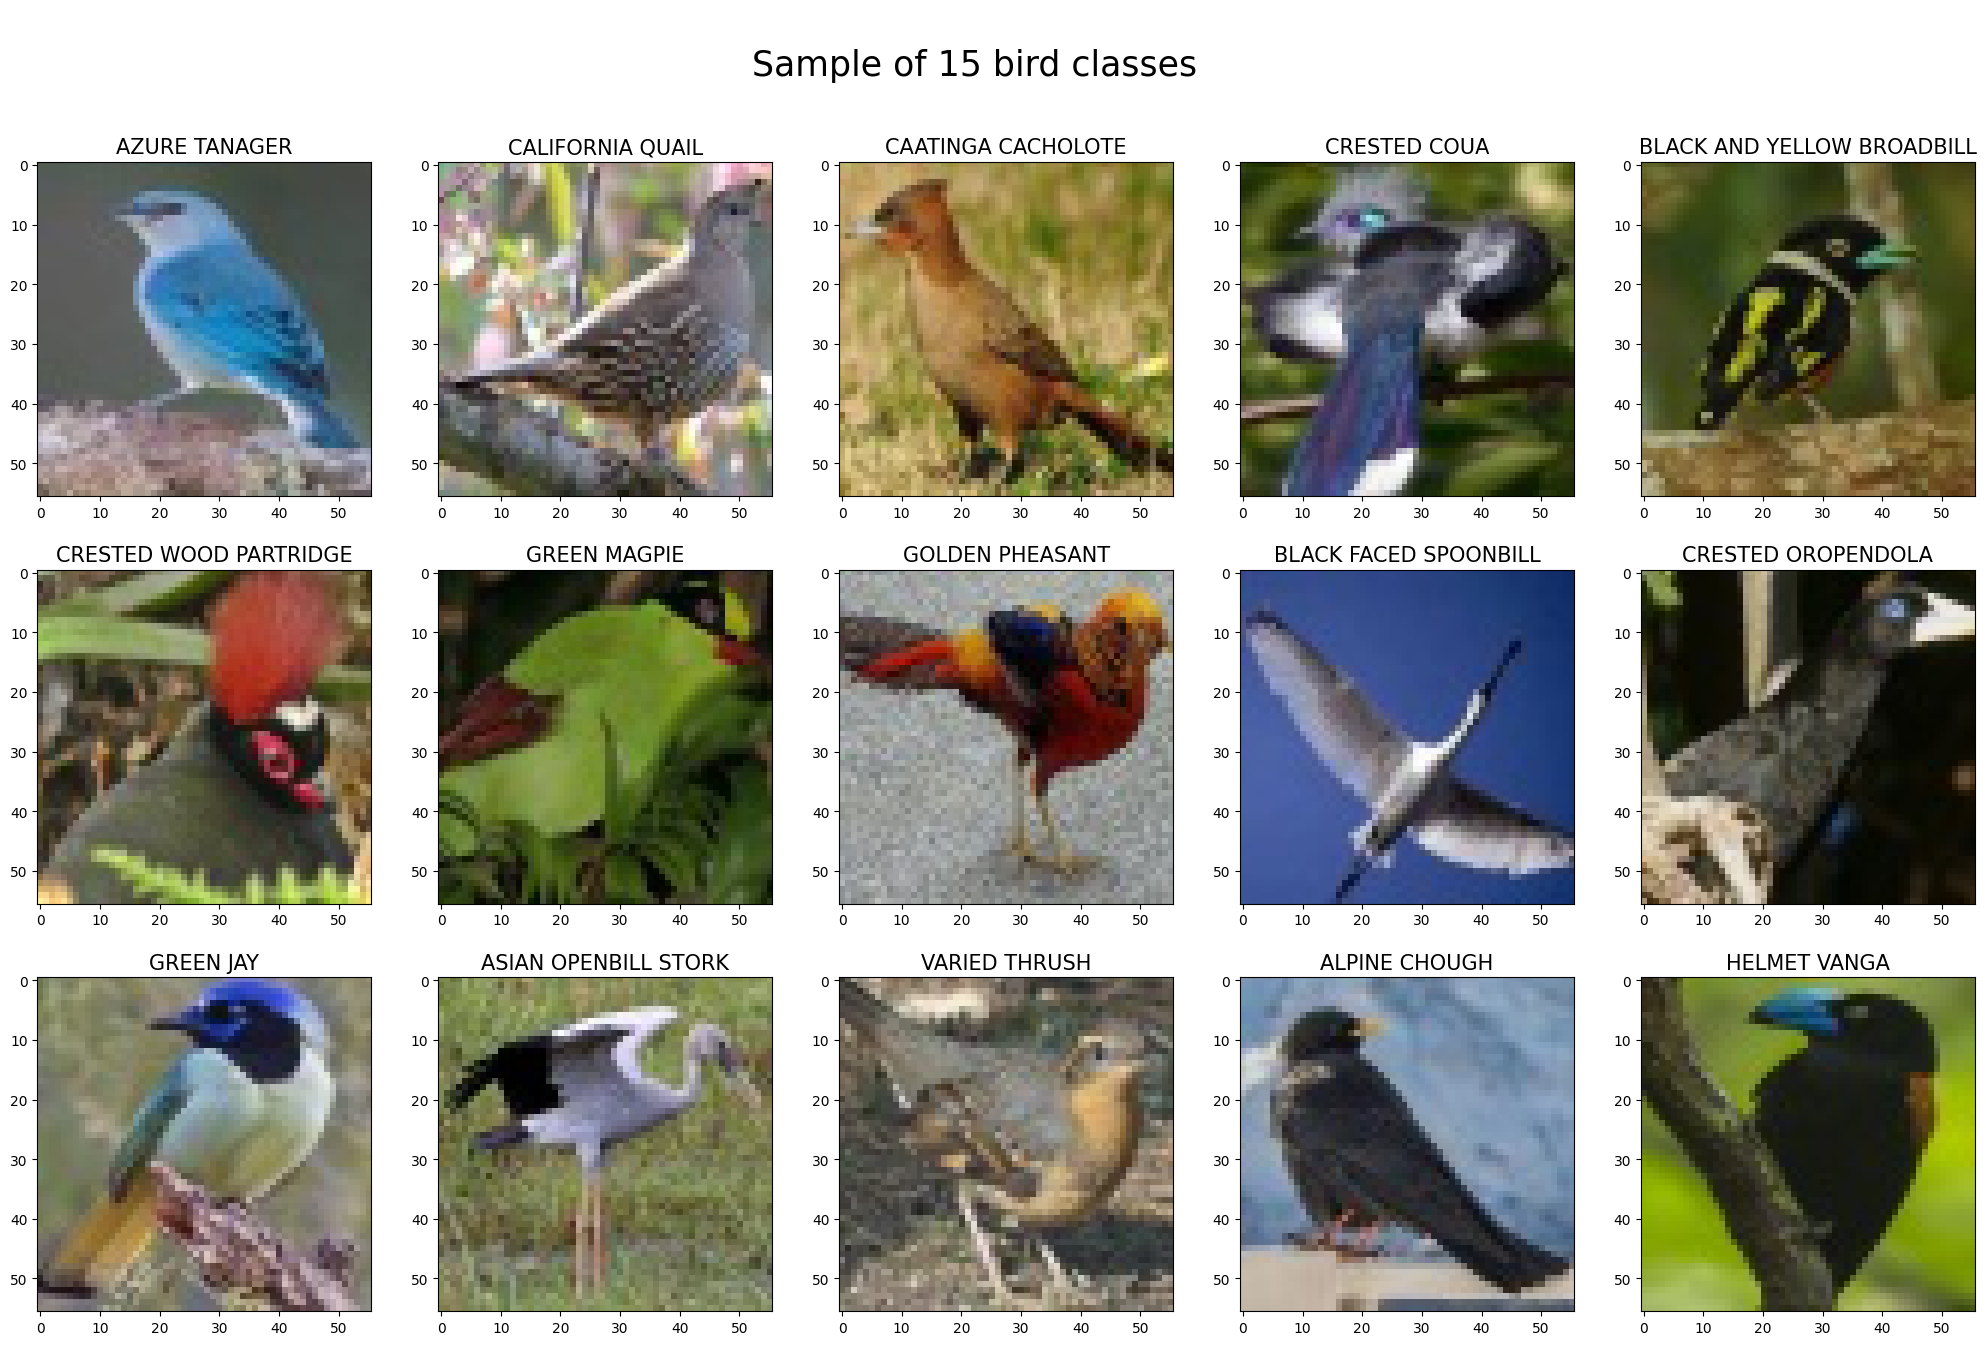

In [4]:
### 3) plot one random image from each bird class
###    modules: b_viewClasses
randomClasses = viewRandomClasses(trainPath, targetClasses[0])
plt.show()

<div class="markdown-google-sans">

<h3>Plot 15 pictures from one of the previously selected random species</h3>
</div>

Finally, we print 15 random images from one of the previously chosen species and show their shape and size as before defined.

GOLDEN PHEASANT
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns, channels): (56, 56, 3)
Image size (number of pixels): 9408
Image shape (rows, columns,

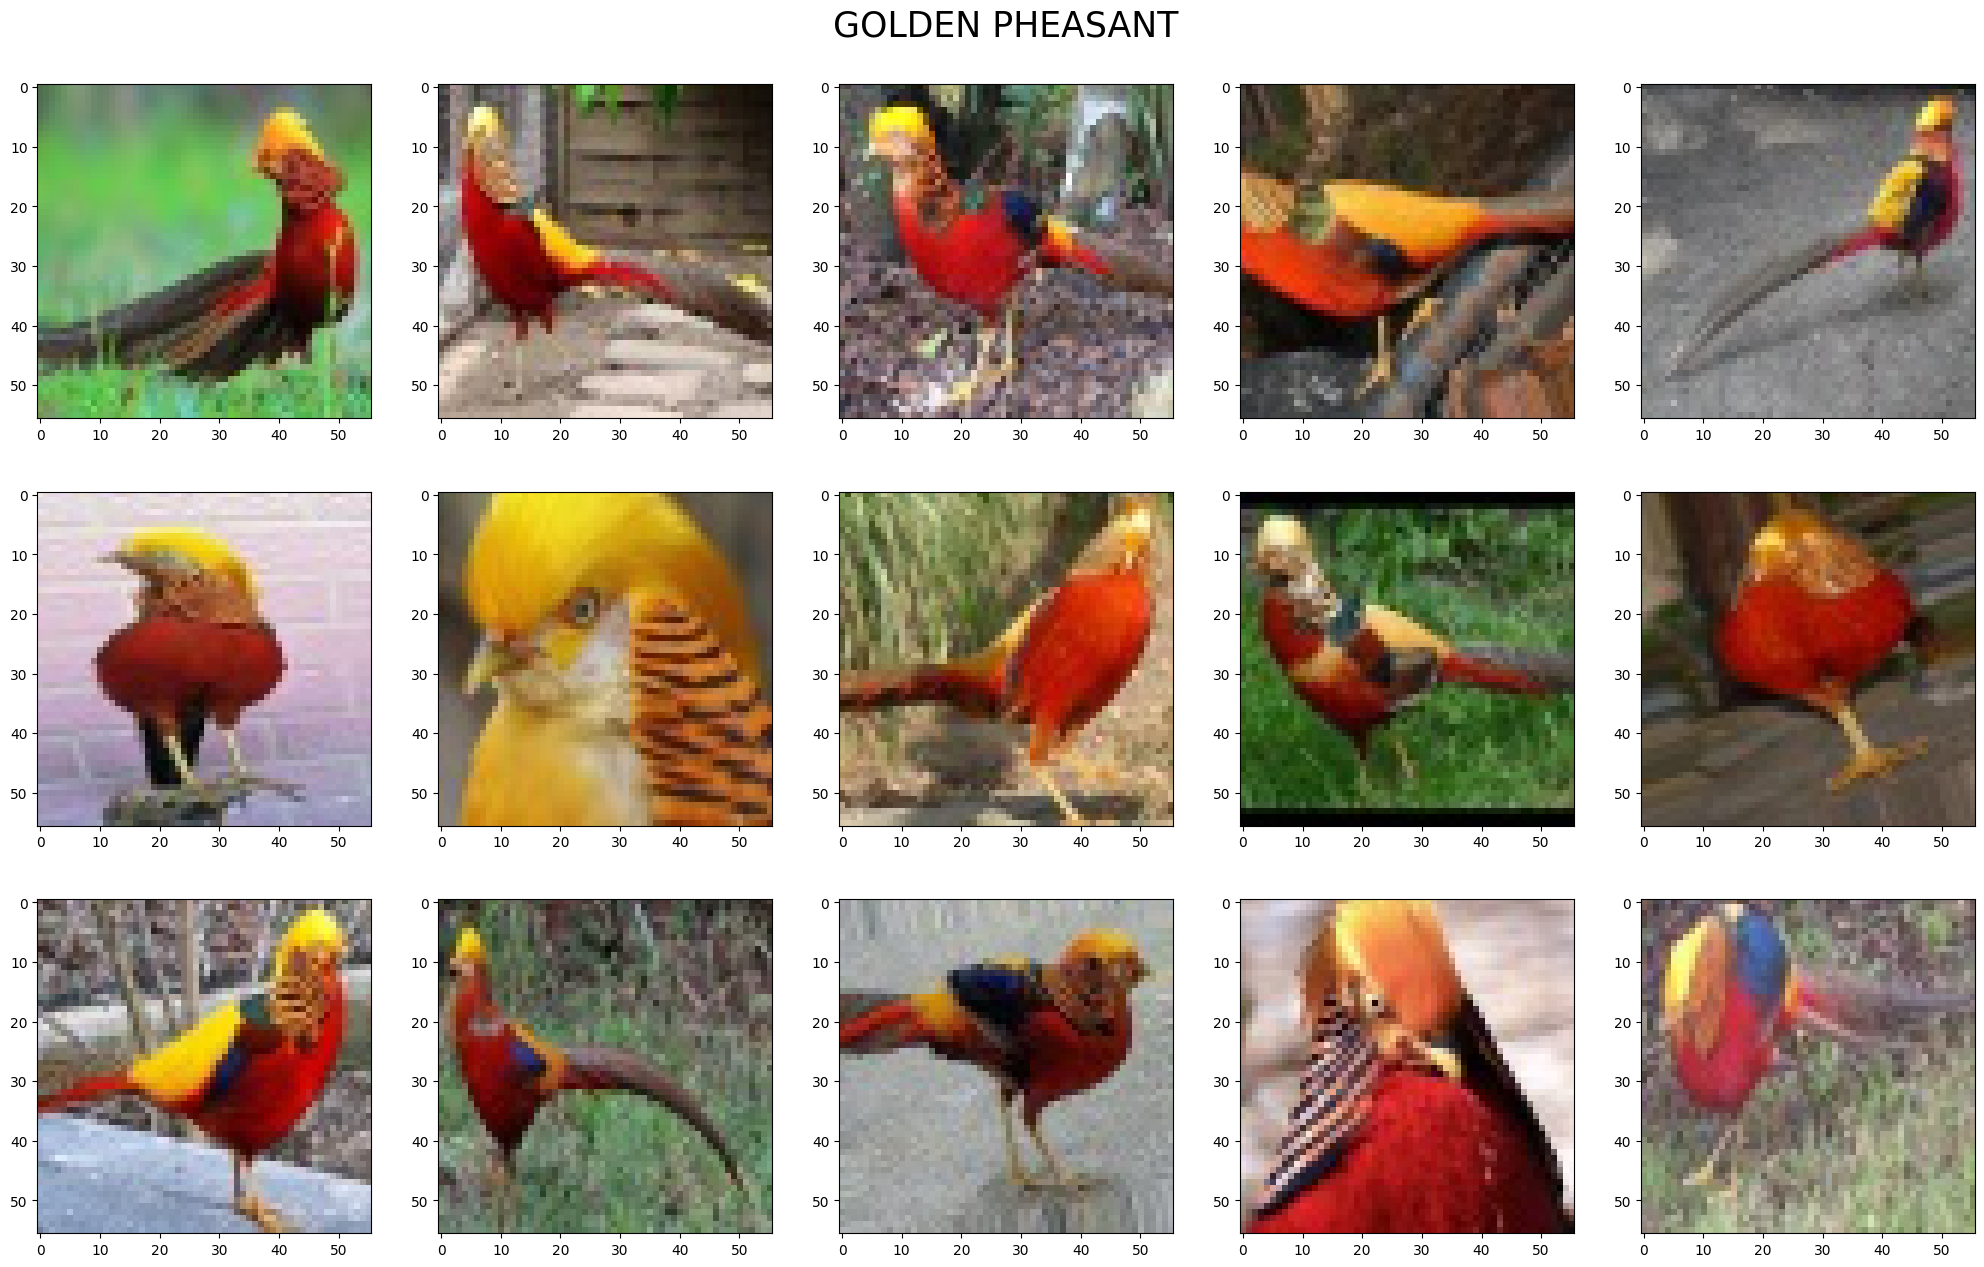


I conclude that, although there is a varying number of images for each bird class,
in our sample of 15 classes there is a minimum of 137 images, and a maximum of 197 images.



In [5]:
### 4) plot 15 random images from one of the classes
###    modules: b_viewClasses
randomClass = viewRandomClass(trainPath, targetClasses[0])
plt.show()
print('\nI conclude that, although there is a varying number of images',
      'for each bird class,')
print('in our sample of 15 classes there is a minimum',
      'of', min(targetClasses[2]), 'images, and a maximum of',
      max(targetClasses[2]), 'images.\n')

<div class="markdown-google-sans">

## <strong>Data preparation</strong>
</div>

The following code allows me to load each image of the train and test sets into Python lists. The lists containing the images are then turned into numerical arrays, with 4 dimensions: the first one represents the number of images, while the other three represent the images' shape, which has been rendered homogeneous (56, 56, 3) by removing those not matching the common shape within the execution of the custom <i>selectData</i> function.

In [6]:
### 5) load the train and test data and labels into memory
trainData, trainClasses = selectData(trainPath)
testData, testClasses = selectData(testPath)
#train data list into numpy array
npTrainData = np.array(trainData)
#test data list into numpy array
npTestData = np.array(testData)

print('Our train data array has', npTrainData.ndim, 'dimensions, and a shape of',
      npTrainData.shape, 'for a total number of elements of', npTrainData.size, '.')
print('Our test data array has', npTestData.ndim, 'dimensions, and a shape of',
      npTestData.shape, 'for a total number of elements of', npTestData.size, '.')

Our train data array has 4 dimensions, and a shape of (82724, 56, 56, 3) for a total number of elements of 778267392 .
Our test data array has 4 dimensions, and a shape of (2575, 56, 56, 3) for a total number of elements of 24225600 .


The data labels represent the bird species to which the images belong. They are first converted into 2D arrays and finally turned into categorical data: bird classes are substituted by numerical categories.<br>
Bird species should be homogeneous across train and test data, so I check if it's actually the case.

In [7]:
### 6) turn the train and test labels into categorical arrays
# train labels

trainClasses = classesToInt(trainClasses)
npTrainClasses = np.array(trainClasses)
npTrainClasses = np.expand_dims(npTrainClasses, axis = 1) # add dimension to array
npTrainLabels = to_categorical(npTrainClasses)
# test labels
testClasses = classesToInt(testClasses)
npTestClasses = np.array(testClasses)
npTestClasses = np.expand_dims(npTestClasses, axis = 1) # add dimension to array
npTestLabels = to_categorical(npTestClasses)

trainCount = countLabels(npTrainClasses) # count train labels
testCount = countLabels(npTestClasses) # count test labels
if trainCount == testCount:
    print('There are', npTrainClasses.size, 'categories (it means that each image',
          'belongs to a category) for a set of', trainCount, 'categories.')
else:
    print('ERROR: train labels count and test labels count don\'t match.')

# free up memory
del trainData, testData, trainClasses, npTrainClasses, testClasses, npTestClasses

There are 82724 categories (it means that each image belongs to a category) for a set of 515 categories.


<div class="markdown-google-sans">

## Data normalization
</div>

At this point I normalize the data by dividing them for the maximum value they can assume. In this way the data range from 0 to 1 and allow for better speed and prediction results.

In [10]:
### 7) normalize the data
npTrainData = np.array(npTrainData / npTrainData.max(), dtype = np.float16)
npTestData = np.array(npTestData / npTestData.max(), dtype = np.float16)

<div class="markdown-google-sans">

## Call the sequential model
</div>

I call the function executing the sequential model from the file d_sequentialModel. The function returns the model history, which is used to train the model and plot the loss function and the model accuracy.

In [12]:
### 8) call the sequential model
myModel = seqModel(npTrainData, npTrainLabels, npTestData, npTestLabels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        896       
                                                                 
 ReLU (Activation)           (None, 54, 54, 32)        0         
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 FC2 (Dense)                 (None, 515)               48056195  
                                                                 
 Softmax (Activation)        (None, 515)               0         
                                                                 
Total params: 48,057,091
Trainable params: 48,057,091
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1035/1035 [======================

I finally plot the loss function for the model and the model accuracy.

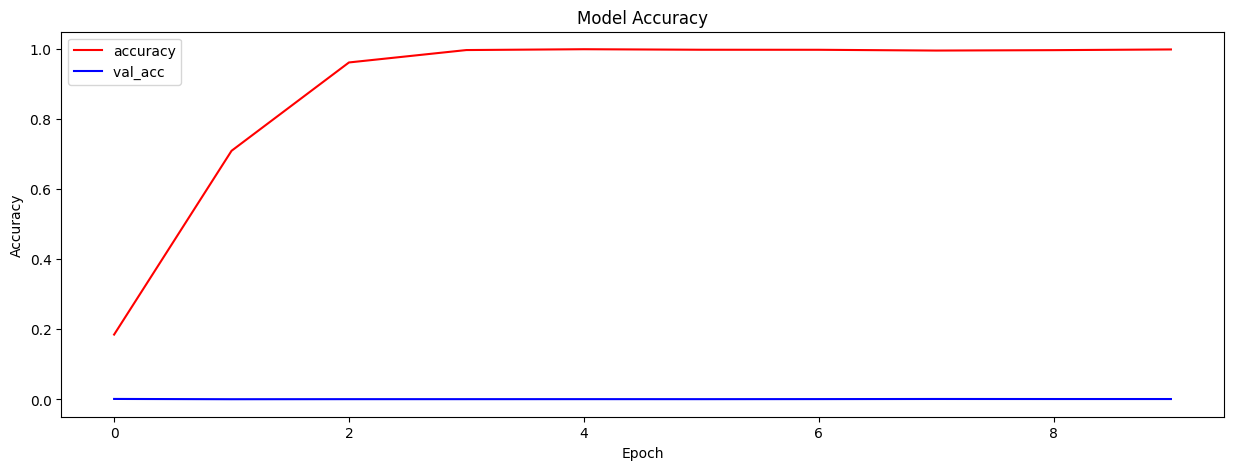

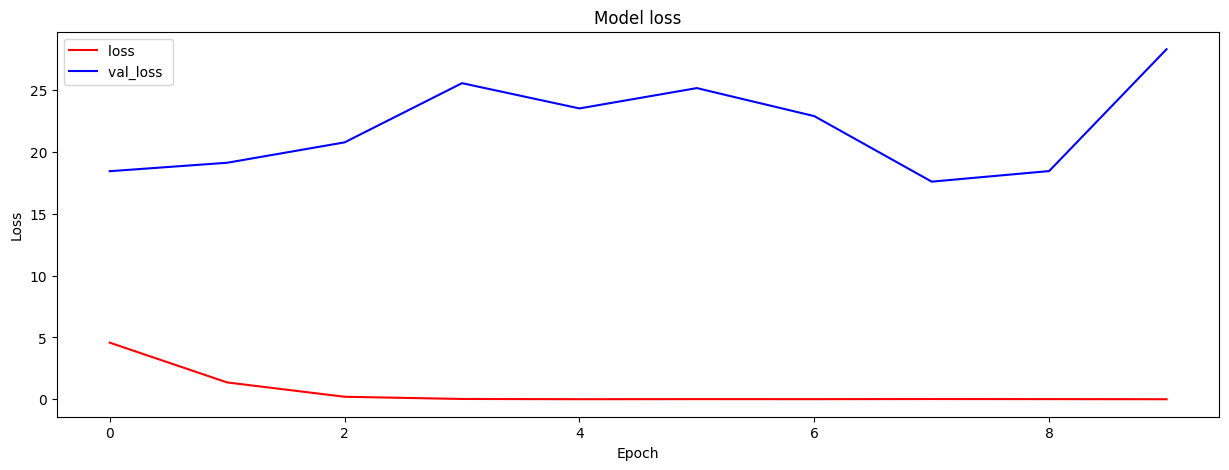

In [13]:
### 9) plot model accuracy and loss function
# accuracy
plt.figure(figsize=(15, 5))
plt.plot(myModel.history['accuracy'], 'r', label='accuracy')
plt.plot(myModel.history['val_accuracy'], 'b', label='val_acc ')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# loss
plt.figure(figsize=(15, 5))
plt.plot(myModel.history['loss'], 'r', label='loss ')
plt.plot(myModel.history['val_loss'], 'b', label='val_loss ')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()